In [1336]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import keras
from keras.layers import Conv1D, Dense, Dropout, Input, Concatenate, GlobalMaxPooling1D, MaxPooling1D, Flatten
from keras.models import Model, Sequential

In [1337]:
realData = np.load('C:\\Users\\dylin\\Documents\\BA_Glare_Effect\\classification_data\\real\\realData.npy')
X_realData = np.load('C:\\Users\\dylin\\Documents\\BA_Glare_Effect\\classification_data\\real\\X_realData.npy')
y_realData = np.load('C:\\Users\\dylin\\Documents\\BA_Glare_Effect\\classification_data\\real\\y_realData.npy')

In [1338]:
X_train, X_test, y_train, y_test = train_test_split(X_realData, y_realData, test_size=0.25, random_state=42)

In [1339]:
X_train[:3]

array([[[ 1.1, 14. , 13. ,  1. ,  0. ],
        [ 2.1, 14. , 12. ,  1. ,  0. ],
        [ 3.1, 14. , 11. ,  1. ,  0. ],
        [ 4.1, 14. , 10. ,  1. ,  0. ],
        [ 2.1, 14. , 10. ,  2. ,  0. ],
        [ 4.1, 14. , 10. ,  2. ,  0. ],
        [ 5.1, 14. ,  9. ,  2. ,  0. ],
        [ 4.1, 14. ,  9. ,  3. ,  0. ],
        [ 6.1, 14. ,  8. ,  3. ,  0. ],
        [ 4.2, 14. ,  7. ,  3. ,  0. ],
        [ 2.1, 14. ,  7. ,  3. ,  0. ],
        [ 4.2, 14. ,  7. ,  3. ,  0. ],
        [ 3.2, 14. ,  6. ,  3. ,  0. ],
        [ 6.2, 14. ,  5. ,  3. ,  0. ],
        [ 7.1, 14. ,  4. ,  3. ,  0. ],
        [ 5.1, 14. ,  4. ,  3. ,  0. ],
        [ 4.1, 14. ,  4. ,  4. ,  0. ],
        [ 7.1, 14. ,  4. ,  4. ,  0. ],
        [ 5.2, 14. ,  3. ,  4. ,  0. ],
        [ 7.1, 14. ,  3. ,  4. ,  0. ],
        [ 2.2, 14. ,  2. ,  4. ,  0. ],
        [ 1.2, 14. ,  1. ,  4. ,  0. ],
        [ 1.1, 14. ,  1. ,  4. ,  0. ],
        [ 2.2, 14. ,  1. ,  4. ,  0. ],
        [ 7.2, 14. ,  0. ,  4. ,  0. ],


In [1340]:
X_test[:3]

array([[[ 1.1, 14. , 13. ,  1. ,  0. ],
        [ 2.1, 14. , 12. ,  1. ,  0. ],
        [ 3.1, 14. , 11. ,  1. ,  0. ],
        [ 4.1, 14. , 10. ,  1. ,  0. ],
        [ 2.2, 14. ,  9. ,  1. ,  0. ],
        [ 2.1, 12. ,  9. ,  2. ,  0. ],
        [ 3.2, 12. ,  8. ,  2. ,  0. ],
        [ 3.1, 10. ,  8. ,  2. ,  0. ],
        [ 5.1, 10. ,  7. ,  2. ,  0. ],
        [ 6.1, 10. ,  6. ,  2. ,  0. ],
        [ 7.1, 10. ,  5. ,  2. ,  0. ],
        [ 6.2, 10. ,  4. ,  2. ,  0. ],
        [ 6.1, 10. ,  4. ,  2. ,  0. ],
        [ 6.2,  8. ,  4. ,  2. ,  0. ],
        [ 5.2,  8. ,  3. ,  2. ,  0. ],
        [ 4.2,  8. ,  2. ,  2. ,  0. ],
        [ 4.1,  8. ,  2. ,  2. ,  0. ],
        [ 4.2,  6. ,  2. ,  2. ,  0. ],
        [ 1.1,  6. ,  2. ,  2. ,  0. ],
        [ 1.2,  4. ,  1. ,  2. ,  0. ],
        [ 7.2,  4. ,  0. ,  2. ,  0. ],
        [ 7.1,  2. ,  0. ,  2. ,  0. ],
        [ 5.2,  2. ,  0. ,  2. ,  0. ],
        [ 5.1,  0. ,  0. ,  2. ,  0. ],
        [ 0. ,  0. ,  0. ,  2. ,  1. ],


In [1341]:
y_train[:3]

array([[0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [1342]:
y_test[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [1343]:
X_train.shape

(30, 40, 5)

In [1344]:
X_test.shape

(10, 40, 5)

In [1345]:
y_train.shape

(30, 2)

In [1346]:
y_test.shape

(10, 2)

In [1347]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

In [1348]:
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=seed)
histories = []
scores = []
n_epochs = 200

In [1349]:
def create_and_train(train, test, n_epochs=n_epochs):
    verbose, epochs, batch_size = 0, n_epochs, 32 
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features))) # filters=64 kernel_size=3
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu')) # filters=64 kernel_size=3
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_realData[train], y_realData[train], epochs=epochs, batch_size=batch_size, verbose=verbose, 
                        shuffle=True, validation_data=(X_realData[test], y_realData[test]))
    histories.append(history)
    score = model.evaluate(X_realData[test], y_realData[test], batch_size=batch_size, verbose=0)
    scores.append(score)

In [1350]:
for i, (train_index, val_index) in enumerate(kfold.split(X_realData, y_realData.argmax(1))):
    create_and_train(train_index, val_index)

In [1351]:
histories[1].history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [1352]:
def mean_score(histories=histories, epochs=n_epochs):
    mean_val_losses = []
    mean_val_accuracies = []
    mean_losses = []
    mean_accuracies = []
    for i in range(epochs):
        val_losses = []
        val_accuracies = []
        losses = []
        accuracies = []
        for l in range(len(histories)):
            history = histories[l]
            val_losses.append(history.history['val_loss'][i])
            val_accuracies.append(history.history['val_accuracy'][i])
            losses.append(history.history['loss'][i])
            accuracies.append(history.history['accuracy'][i])
        mean_val_losses.append(np.mean(val_losses))
        mean_val_accuracies.append(np.mean(val_accuracies))
        mean_losses.append(np.mean(losses))
        mean_accuracies.append(np.mean(accuracies))
    return mean_val_losses, mean_val_accuracies, mean_losses, mean_accuracies

In [1353]:
mean_val_losses, mean_val_accuracies, mean_losses, mean_accuracies = mean_score()

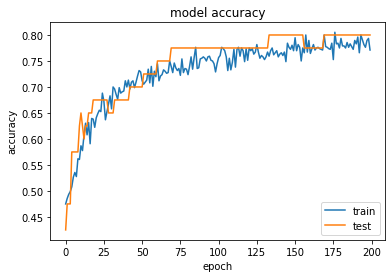

In [1354]:
plt.title('model accuracy')
plt.plot(mean_accuracies)
plt.plot(mean_val_accuracies)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

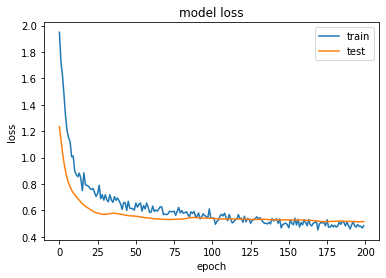

In [1355]:
plt.title('model loss')
plt.plot(mean_losses)
plt.plot(mean_val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [1356]:
final_mean_accuracy = mean_accuracies[-1]
final_mean_accuracy

0.77105254

In [1357]:
final_mean_val_accuracy = mean_val_accuracies[-1]
final_mean_val_accuracy

0.8

In [1358]:
mean_val_accuracies[160:240]

[0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8]